# Context
Twenty One Pilots is an American musical duo that originates from Columbus, Ohio. The band was founded by lead singer Tyler Joseph in 2009 along with former members Nick Thomas and Chris Salih who left in 2011. The band's current line up features Joseph and drummer Josh Dun. 


The duo is best known for the singles "Stressed Out", "Ride", and "Heathens". The group received a Grammy Award for Best Pop Duo/Group Performance at the 59th Annual Grammy Awards for "Stressed Out". The band independently released two albums, Twenty One Pilots (2009) and Regional at Best (2011), before being signed by record label Fueled by Ramen in 2012. Their label debut, Vessel, was released in 2013 and became the second album in history on which every track received at least a gold certification, making Twenty One Pilots the first band in the history of music to see every song on two albums earn gold or platinum awards.

Genres: Alternative hip hop, electropop, indie pop, pop rock, rap rock, alternative rock.

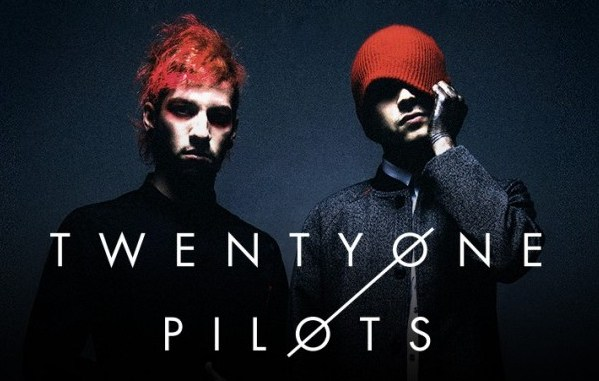

# Data source


Spotify API, "Twenty One Pilots discography.”
[https://developer.spotify.com/](https://developer.spotify.com/)

# Data dictionary

* **duration_ms:** The duration of the track in milliseconds.

* **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

* **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy:** Represents a perceptual measure of intensity and activity (from 0.0 to 1.0).

* **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.

* **loudness:** The overall loudness of a track in decibels (typical range between -60 and 0 db).

* **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value.

* **instrumentalness:** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

* **liveness:** Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

* **key_mode:** The key the track is in.

* **tempo:** The overall estimated tempo of a track in beats per minute (BPM).

* **time_signature:** An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

## Import libraries and load data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twenty-one-pilots-discography/twentyscience.csv


In [2]:
data= pd.read_csv("/kaggle/input/twenty-one-pilots-discography/twentyscience.csv")
dfv= data.copy()

In [3]:
dfv.head()

,Unnamed: 0,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode
0,1,2021-05-21,2021,0.684,0.677,7,-7.355,1,0.0401,0.110000,...,204400,False,False,Good Day,1,track,Scaled And Icy,G,major,G major
1,2,2021-05-21,2021,0.700,0.664,7,-8.211,1,0.0394,0.306000,...,223065,False,False,Choker,2,track,Scaled And Icy,G,major,G major
2,3,2021-05-21,2021,0.588,0.856,9,-5.242,0,0.0316,0.000818,...,175044,False,False,Shy Away,3,track,Scaled And Icy,A,minor,A minor
3,4,2021-05-21,2021,0.785,0.623,11,-6.923,1,0.0403,0.050500,...,216758,False,False,The Outside,4,track,Scaled And Icy,B,major,B major
4,5,2021-05-21,2021,0.687,0.890,8,-5.990,1,0.0344,0.003960,...,172232,False,False,Saturday,5,track,Scaled And Icy,G#,major,G# major


In [4]:
dfv.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
dfv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_release_date  130 non-null    object 
 1   album_release_year  130 non-null    int64  
 2   danceability        130 non-null    float64
 3   energy              130 non-null    float64
 4   key                 130 non-null    int64  
 5   loudness            130 non-null    float64
 6   mode                130 non-null    int64  
 7   speechiness         130 non-null    float64
 8   acousticness        130 non-null    float64
 9   instrumentalness    130 non-null    float64
 10  liveness            130 non-null    float64
 11  valence             130 non-null    float64
 12  tempo               130 non-null    float64
 13  time_signature      130 non-null    int64  
 14  disc_number         130 non-null    int64  
 15  duration_ms         130 non-null    int64  
 16  explicit

In [6]:
dfv.describe().T

,count,mean,std,min,25%,50%,75%,max
album_release_year,130.0,2014.000000,3.055050,2009.000000,2013.000000,2013.00000,2015.000000,2021.000
danceability,130.0,0.654854,0.107727,0.228000,0.589000,0.68000,0.728750,0.840
energy,130.0,0.583603,0.232604,0.023100,0.467500,0.64750,0.759750,0.937
key,130.0,5.738462,3.555875,0.000000,2.000000,6.00000,9.000000,11.000
loudness,130.0,-8.981623,6.433351,-29.028000,-8.329000,-6.80350,-5.699000,-3.608
mode,130.0,0.676923,0.469461,0.000000,0.000000,1.00000,1.000000,1.000
speechiness,130.0,0.148484,0.268976,0.025500,0.039525,0.04580,0.079700,0.959
acousticness,130.0,0.226543,0.271016,0.000163,0.043700,0.10650,0.289250,0.994
instrumentalness,130.0,0.008329,0.029514,0.000000,0.000000,0.00001,0.000465,0.226
liveness,130.0,0.194374,0.160468,0.043600,0.087400,0.14600,0.239500,0.849


# Exploratory data analysis

## **What is twenty one pilots favorite key?**

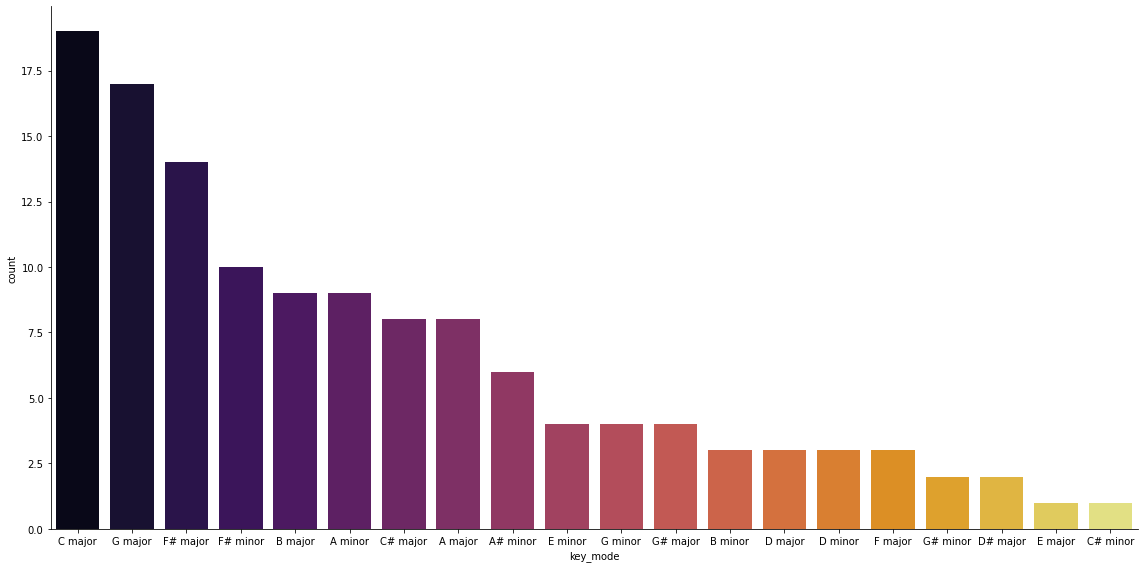

In [7]:
sns.catplot(x="key_mode",kind="count",data=dfv,height=8,aspect=2,palette="inferno",order=dfv['key_mode'].value_counts().index)





---


**There are two songs on unusual keys:**
*   Trapdoor (C# minor)
*   Cut my lip (E major)



In [8]:
dfv[dfv.key_mode=="C# minor"]

,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode
125,2009-12-29,2009,0.55,0.625,1,-8.213,0,0.0399,0.149,0.0,...,277013,False,False,Trapdoor,10,track,Twenty One Pilots,C#,minor,C# minor


In [9]:
dfv[dfv.key_mode=="E major"]

,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode
20,2018-10-05,2018,0.641,0.561,4,-5.856,1,0.0355,0.12,0.0021,...,282613,False,False,Cut My Lip,10,track,Trench,E,major,E major


## **Activity**

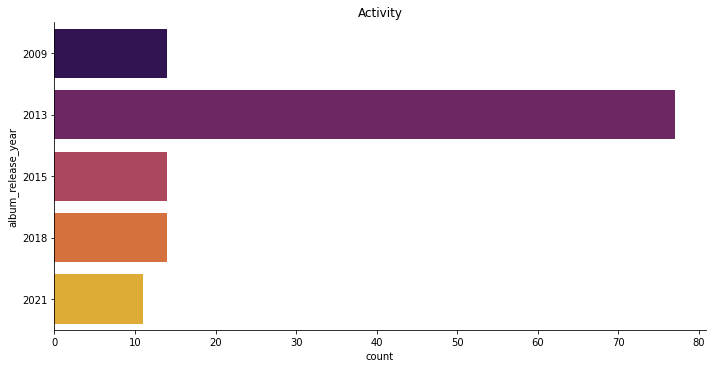

In [10]:
sns.catplot(y="album_release_year",kind="count",data=dfv,aspect=2,height=5,palette="inferno").set(title="Activity")



---

2013 seems to have more discography. Let's take a look

In [11]:
dfv.groupby('album_release_year')["album_name"].value_counts()

album_release_year  album_name                
2009                Twenty One Pilots             14
2013                Vessel                        54
                    Vessel (with Bonus Tracks)    16
                    Spotify Sessions               7
2015                Blurryface                    14
2018                Trench                        14
2021                Scaled And Icy                11
Name: album_name, dtype: int64

In that year Vessel was published along with the bonus track and the Spotify sessions.

### **Their audio features by year**

[Text(0.5, 1.0, 'Tempo')]

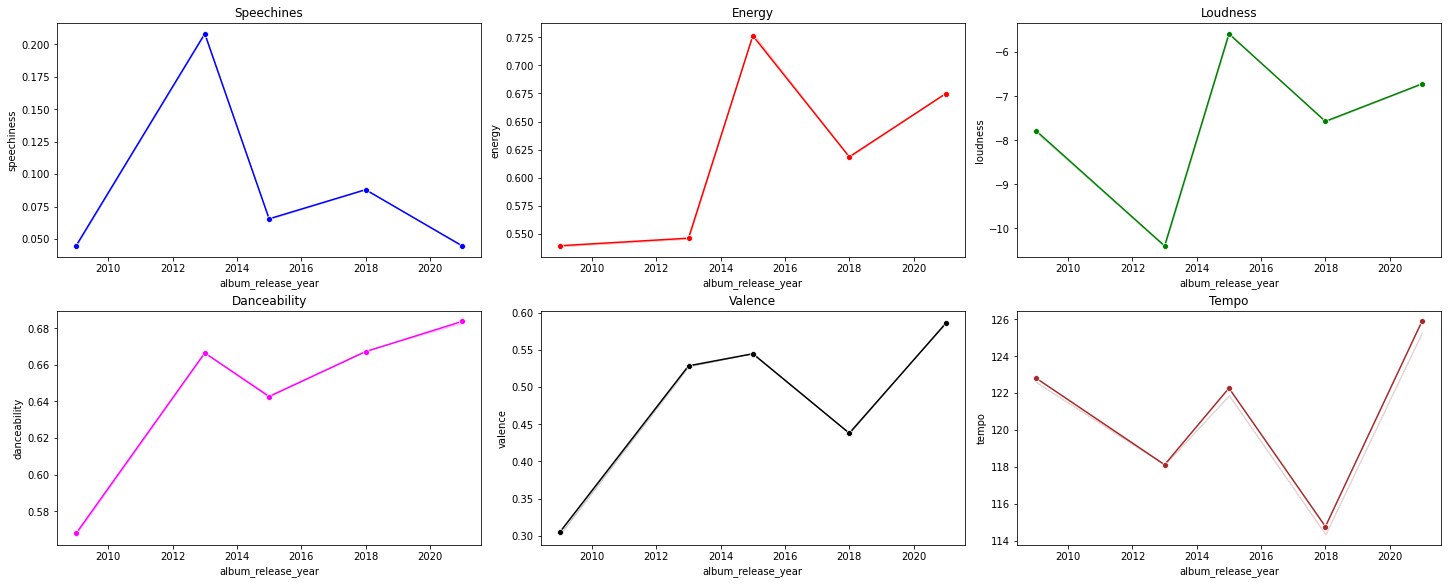

In [12]:
fig, axe= plt.subplots(2,3,figsize=(20,8),constrained_layout=True) 

sns.lineplot(x="album_release_year",y="speechiness", data=dfv,ci=False,markers=True,color="blue",marker='o',ax=axe[0,0]).set(title="Speechines")
sns.lineplot(x="album_release_year",y="energy", data=dfv,ci=False,markers=True,color="red",marker='o',ax=axe[0,1]).set(title="Energy")
sns.lineplot(x="album_release_year",y="loudness", data=dfv,ci=False,markers=True,color="green",marker='o',ax=axe[0,2]).set(title="Loudness")
sns.lineplot(x="album_release_year",y="danceability", data=dfv,ci=False,markers=True,color="magenta",marker='o',ax=axe[1,0]).set(title="Danceability")
sns.lineplot(x="album_release_year",y="valence", data=dfv,ci=False,markers=True,color="black",marker='o',ax=axe[1,1]).set(title="Valence")
sns.lineplot(x="album_release_year",y="tempo", data=dfv,ci=False,markers=True,color="brown",marker='o',ax=axe[1,2]).set(title="Tempo")


## **Explicit**

In [13]:
dfv[dfv.explicit==True]

,album_release_date,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,duration_ms,explicit,is_local,track_name,track_number,type,album_name,key_name,mode_name,key_mode




---

No explicit songs!

## **Audio features**


[Text(0.5, 1.0, 'Tempo')]

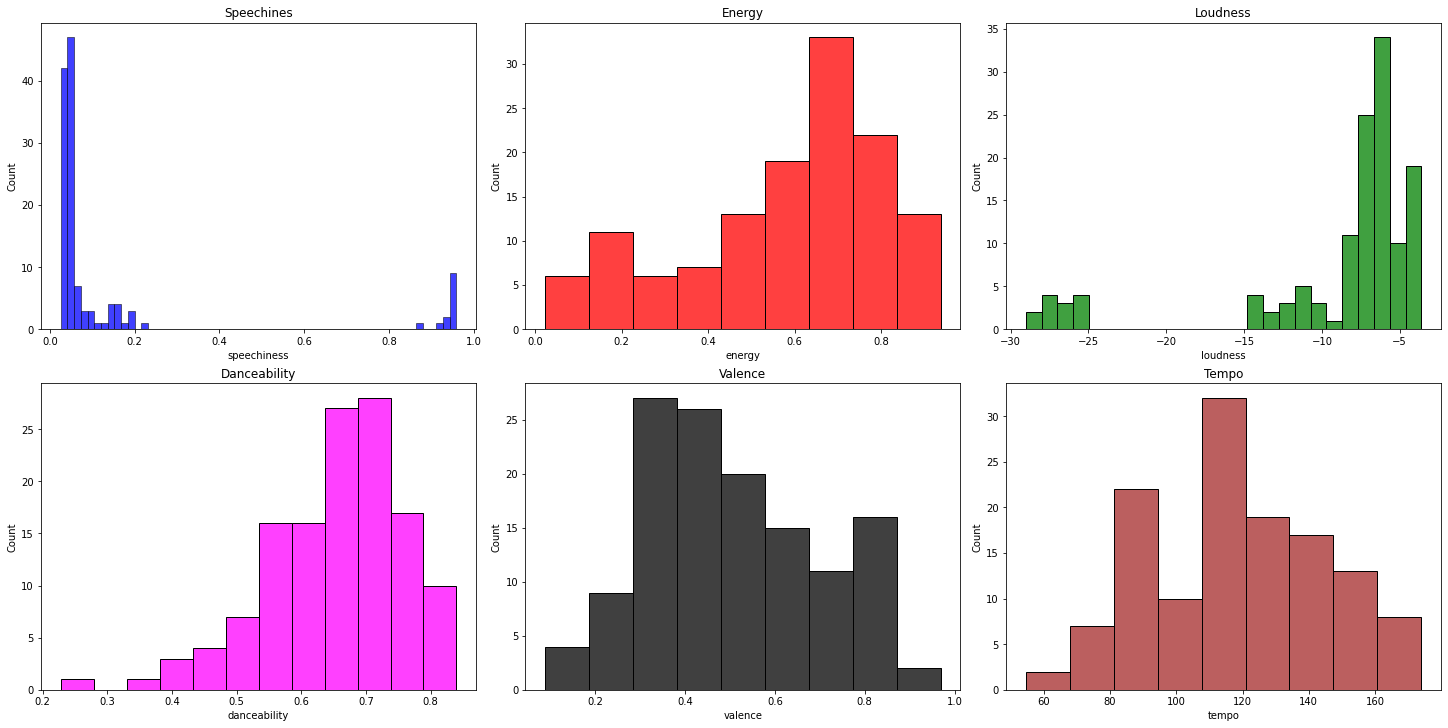

In [14]:
fig, axe= plt.subplots(2,3,figsize=(20,10),constrained_layout=True) 

sns.histplot(x="speechiness",data=dfv,color="blue",ax=axe[0,0]).set(title="Speechines")
sns.histplot(x="energy",data=dfv,color="red",ax=axe[0,1]).set(title="Energy")
sns.histplot(x="loudness",data=dfv,color="green",ax=axe[0,2]).set(title="Loudness")
sns.histplot(x="danceability",data=dfv,color="magenta",ax=axe[1,0]).set(title="Danceability")
sns.histplot(x="valence",data=dfv,color="black",ax=axe[1,1]).set(title="Valence")
sns.histplot(x="tempo",data=dfv,color="brown",ax=axe[1,2]).set(title="Tempo")






---



**Intense songs, with a good noise and varied tempo. They tend to be danceable with a low-medium musical positiveness.**











## **Outliers**

Let's continue to explore the distribution of the features to see what we find.We will use box diagrams this time to detect outliers.

[Text(0.5, 1.0, 'tempo')]

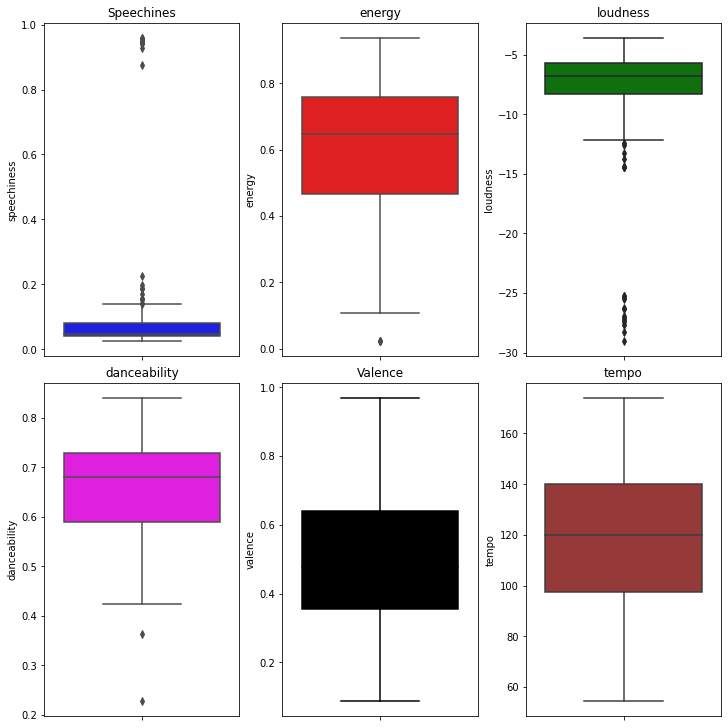

In [15]:
fig, axe= plt.subplots(2,3,figsize=(10,10),constrained_layout=True) 
sns.boxplot(y="speechiness",data=dfv,color="blue",ax=axe[0,0]).set(title="Speechines")
sns.boxplot(y="energy",data=dfv,color="red",ax=axe[0,1]).set(title="energy")
sns.boxplot(y="loudness",data=dfv,color="green",ax=axe[0,2]).set(title="loudness")
sns.boxplot(y="danceability",data=dfv,color="magenta",ax=axe[1,0]).set(title="danceability")
sns.boxplot(y="valence",data=dfv,color="black",ax=axe[1,1]).set(title="Valence")
sns.boxplot(y="tempo",data=dfv,color="brown",ax=axe[1,2]).set(title="tempo")

Working with outliers

In [16]:
#Energy
print("Min:")
print(dfv[dfv.energy==dfv.energy.min()].track_name)
print("")
print("Max")
print(dfv[dfv.energy==dfv.energy.max()].track_name)

Min:
69     Truce
85     Truce
99     Truce
111    Truce
Name: track_name, dtype: object

Max
86    Guns for Hands - Live at the LC Pavilion
Name: track_name, dtype: object




---






**Truce** is the song with the least intensity in his entire discography.It makes sense because it is a slow song with just a piano. 
The song with the most energy according to spotify metrics is a **Guns for Hands Live**. It also makes sense as it is a more powerful song added to the fact that it is recorded live.

In [18]:
#Danceability
print("Min:")
print(dfv[dfv.danceability==dfv.danceability.min()].track_name)
print("")
print("Max")
print(dfv[dfv.danceability==dfv.danceability.max()].track_name)

Min:
120    Friend, Please
Name: track_name, dtype: object

Max
66     Fake You Out
82     Fake You Out
96     Fake You Out
108    Fake You Out
Name: track_name, dtype: object




---


**Friend, Please** doesn't seem like a good option to dance for a while. On the other hand, **Fake You Out** is ideal for a party

In [19]:
#Valence
print("Min:")
print(dfv.sort_values('valence',ascending=True)['track_name'].head())
print("")
print("Max")
print(dfv.sort_values('valence',ascending=False)['track_name'].head())

Min:
9                     No Chances
124                  Air Catcher
129     Isle Of Flightless Birds
121             March To The Sea
128    Before You Start Your Day
Name: track_name, dtype: object

Max
39    Intro - Live from SXSW
30                  Lane Boy
4                   Saturday
77             House of Gold
61             House of Gold
Name: track_name, dtype: object




---
Valence express the musical positiveness conveyed by a track. **Lane boy, Saturday and House of Gold** seem to be full of good vibes. However, songs like **No Chances, Air Catchet and IOFB** seem to be the darkest.



In [20]:
#Speechiness
dfv[(dfv.speechiness>0.7)].track_name

39                  Intro - Live from SXSW
46         Ode to Sleep - Bonus Commentary
47    Holding on to You - Bonus Commentary
48             Migraine - Bonus Commentary
49        House of Gold - Bonus Commentary
50            Car Radio - Bonus Commentary
51       Semi-Automatic - Bonus Commentary
52               Screen - Bonus Commentary
53       The Run and Go - Bonus Commentary
54         Fake You Out - Bonus Commentary
55       Guns for Hands - Bonus Commentary
56                Trees - Bonus Commentary
57                Truce - Bonus Commentary
Name: track_name, dtype: object

**Outliers are recorded comments on songs, it makes sense when it comes to this metric.**

In [21]:
#Speechiness
print("Min:")
print(dfv[dfv.speechiness==dfv.speechiness.min()].track_name)
print("")
print("Max")
print(dfv[dfv.speechiness==dfv.speechiness.max()].track_name)

Min:
123    Oh Ms Believer
Name: track_name, dtype: object

Max
54    Fake You Out - Bonus Commentary
Name: track_name, dtype: object




---


**Oh Ms Believer** seems to be the song with the least speechiness

## **Correlation**

In [22]:
df= dfv.copy()

In [23]:
explidummy=pd.get_dummies(df.explicit,prefix="Explicit", drop_first=True)
df = pd.concat([df, explidummy], axis=1)
df.drop(["explicit"],axis=1, inplace=True)

In [24]:
locdummy=pd.get_dummies(df.is_local,prefix="Is_local", drop_first=True)
df = pd.concat([df, locdummy], axis=1)
df.drop(["is_local"],axis=1, inplace=True)

In [25]:
moddummy=pd.get_dummies(df.mode_name,prefix="modeName", drop_first=True)
df = pd.concat([df, moddummy], axis=1)
df.drop(["mode_name"],axis=1, inplace=True)

In [26]:
df.drop(["album_release_date","type","album_name","key_name","key_mode","disc_number"],axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   album_release_year  130 non-null    int64  
 1   danceability        130 non-null    float64
 2   energy              130 non-null    float64
 3   key                 130 non-null    int64  
 4   loudness            130 non-null    float64
 5   mode                130 non-null    int64  
 6   speechiness         130 non-null    float64
 7   acousticness        130 non-null    float64
 8   instrumentalness    130 non-null    float64
 9   liveness            130 non-null    float64
 10  valence             130 non-null    float64
 11  tempo               130 non-null    float64
 12  time_signature      130 non-null    int64  
 13  duration_ms         130 non-null    int64  
 14  track_name          130 non-null    object 
 15  track_number        130 non-null    int64  
 16  modeName

<AxesSubplot:>

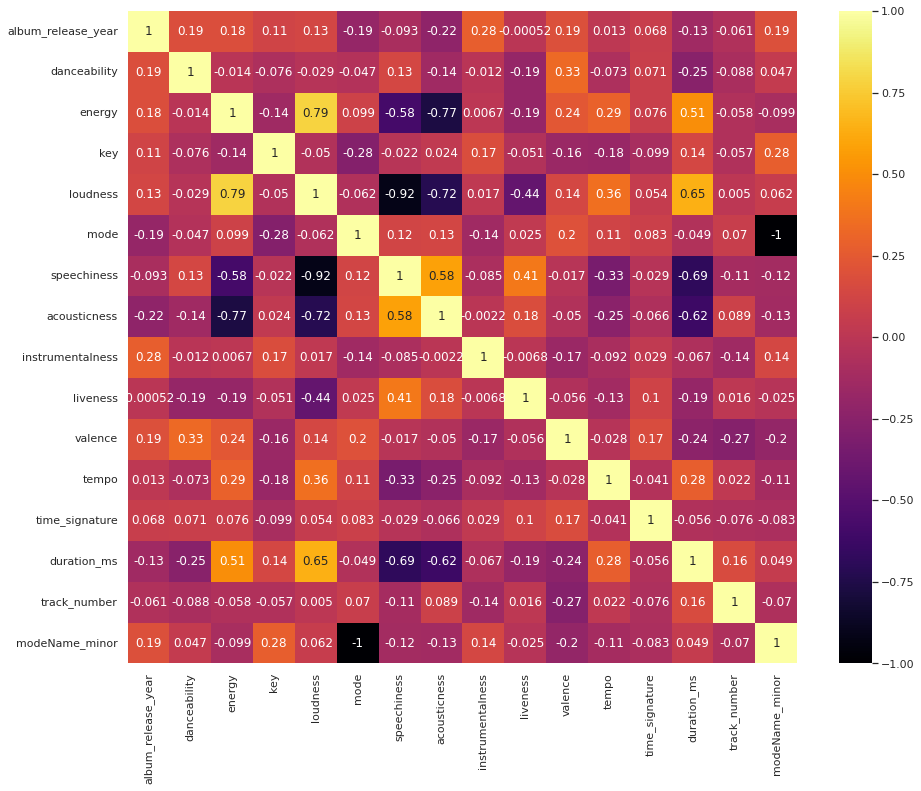

In [28]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(df.corr(),annot=True,cmap="inferno")






---


Observations:
* There is a relationship between energy and loudness. The louder a song is, the more energetic it is.
* There is an inverse relationship between acousticness and energy. It makes sense since an acoustic version tends not to be as loud.
* There is an inverse relationship between speechiness and the duration of the song.
* Strong correlation between speechiness and the loudness, let's check.

<AxesSubplot:xlabel='speechiness', ylabel='loudness'>

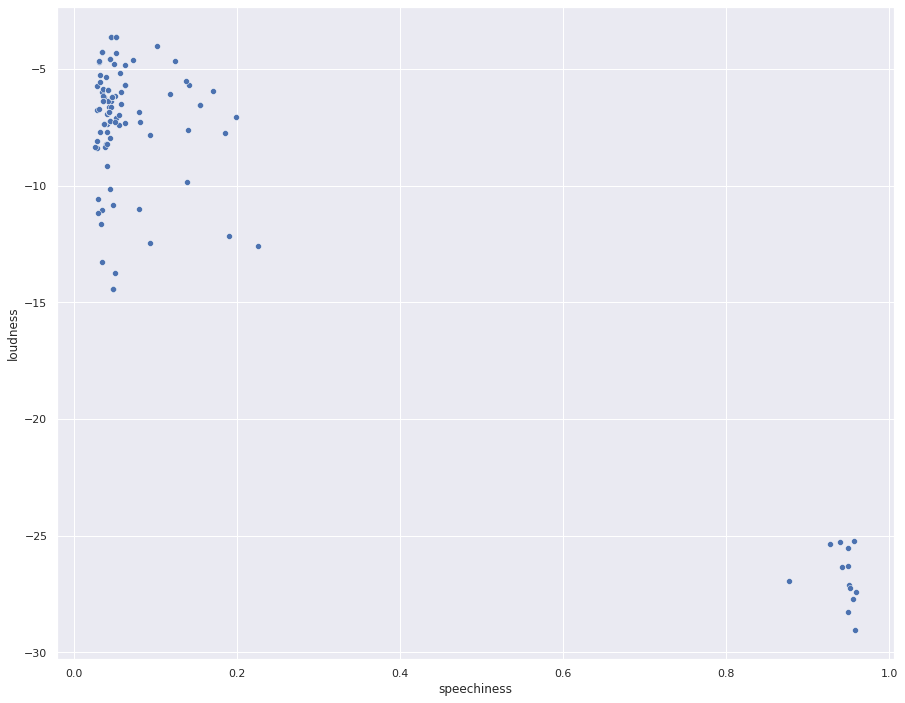

In [29]:
sns.scatterplot(x="speechiness",y="loudness",data=df)



---
Interesting, the more words in the song, the less noisy it is. Why?



What songs are located in the cluster at the bottom right?

In [30]:
df[(df.loudness<-26)&(df.speechiness>0.8)].track_name

39               Intro - Live from SXSW
50         Car Radio - Bonus Commentary
51    Semi-Automatic - Bonus Commentary
52            Screen - Bonus Commentary
53    The Run and Go - Bonus Commentary
54      Fake You Out - Bonus Commentary
55    Guns for Hands - Bonus Commentary
56             Trees - Bonus Commentary
57             Truce - Bonus Commentary
Name: track_name, dtype: object

**Oh, that is the answer. It's not about songs, it's about recorded commentary.**
The relationship between speechiness and the duration of the song is due to the same factor.

# Albums
Radar charts and Valence per song

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfs= dfv.copy()
dfs.loudness= scaler.fit_transform(dfv['loudness'].values.reshape(-1,1))

In [33]:
categories=["energy","danceability","loudness","valence"]

In [34]:
top= dfs[dfs.album_name=="Twenty One Pilots"][["energy","danceability","loudness","valence"]].mean(axis=0).values
vess= dfs[dfs.album_name=="Vessel"][["energy","danceability","loudness","valence"]].mean(axis=0).values
blur= dfs[dfs.album_name=="Blurryface"][["energy","danceability","loudness","valence"]].mean(axis=0).values
tren= dfs[dfs.album_name=="Trench"][["energy","danceability","loudness","valence"]].mean(axis=0).values
sai= dfs[dfs.album_name=="Scaled And Icy"][["energy","danceability","loudness","valence"]].mean(axis=0)

### *TWENTY ONE PILOTS*

In [35]:
temp = pd.DataFrame(dict(
    r=top,
    theta=categories))
fig = px.line_polar(temp, r='r', theta='theta', line_close=True)
fig.update_layout(
    autosize=False,
    width=500,
    height=450,)
fig.update_traces(fill='toself',fillcolor='rgba(39, 160, 53, 0.51)')
fig.show()

**Valence for song:**


<AxesSubplot:xlabel='valence', ylabel='track_name'>

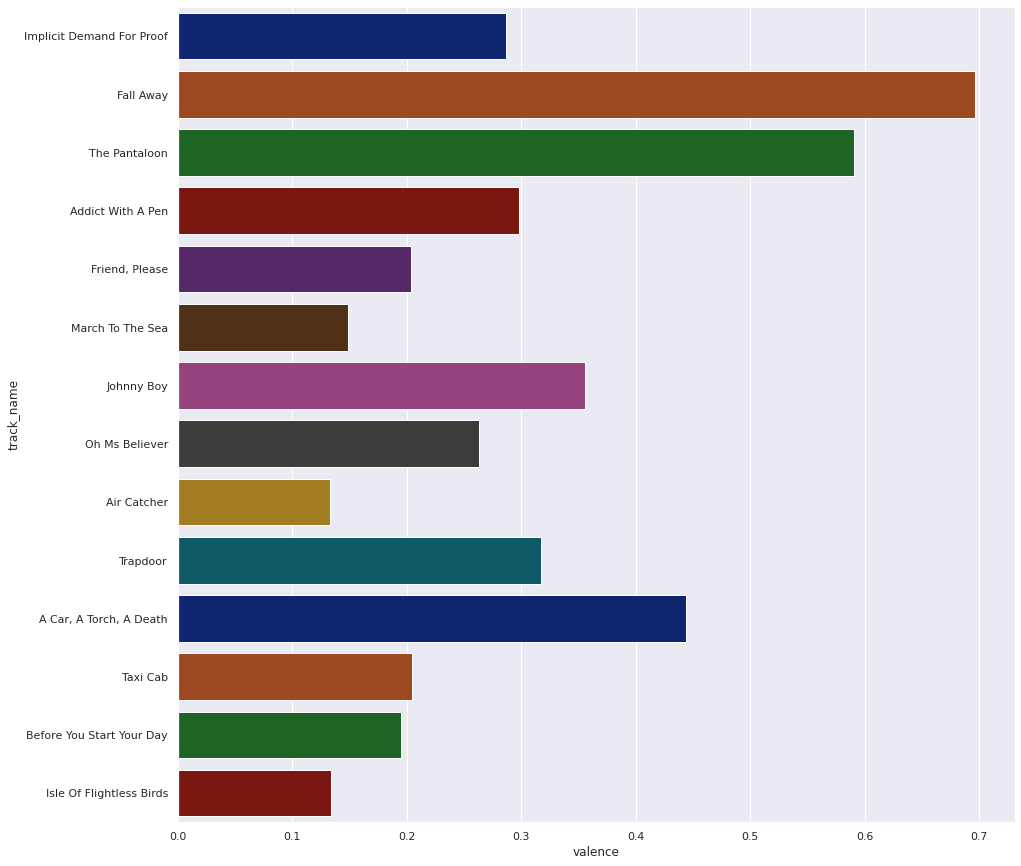

In [36]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y="track_name",x="valence",data=dfv[dfv.album_name=="Twenty One Pilots"],palette="dark")

### *VESSEL*

In [37]:
temp = pd.DataFrame(dict(
    r=vess,
    theta=categories))
fig = px.line_polar(temp, r='r', theta='theta', line_close=True)
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.update_traces(fill='toself')
fig.show()

**Valence for song:**


<AxesSubplot:xlabel='valence', ylabel='track_name'>

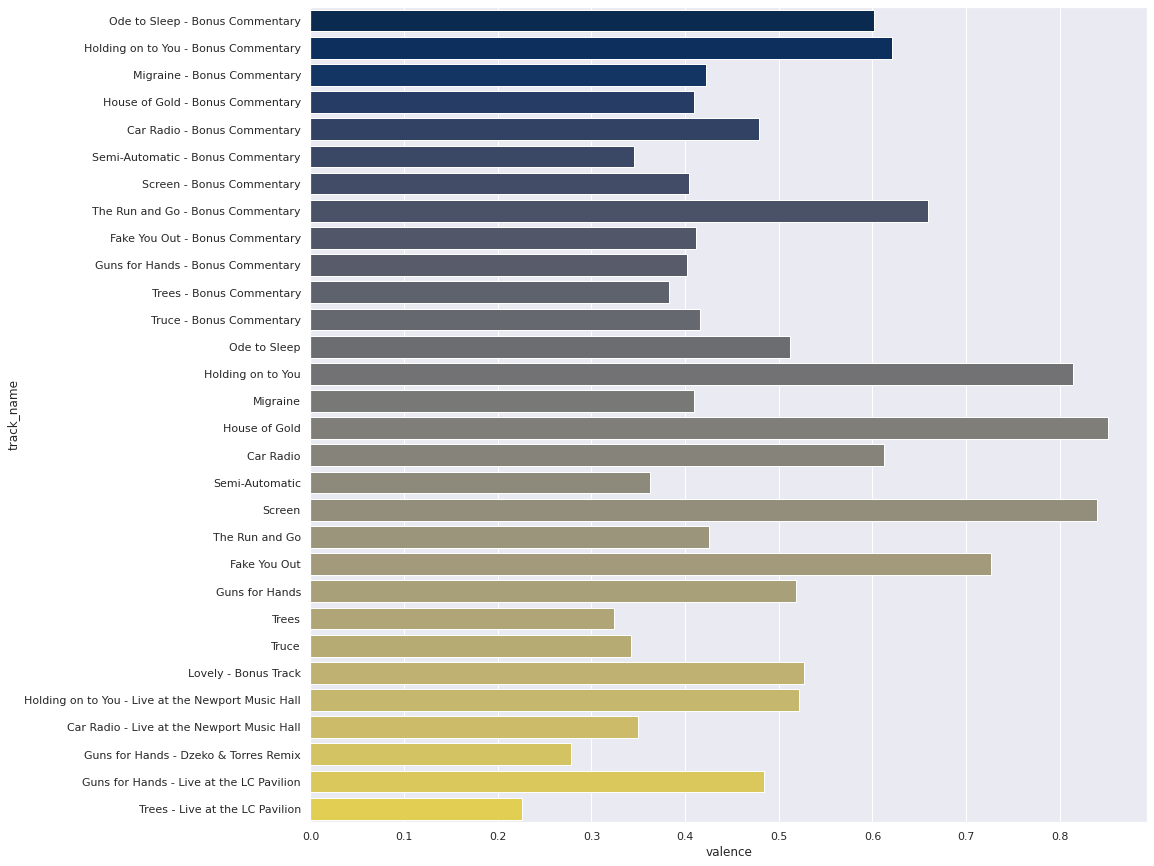

In [38]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y="track_name",x="valence",data=dfv[dfv.album_name=="Vessel"],palette="cividis")

### *BLURRYFACE*

In [39]:
temp = pd.DataFrame(dict(
    r=blur,
    theta=categories))
fig = px.line_polar(temp, r='r', theta='theta', line_close=True)
fig.update_layout(
    autosize=False,
    width=500,
    height=450,)
fig.update_traces(fill='toself',fillcolor='rgba(134, 29, 29, 0.72)')
fig.show()

**Valence for song:**


<AxesSubplot:xlabel='valence', ylabel='track_name'>

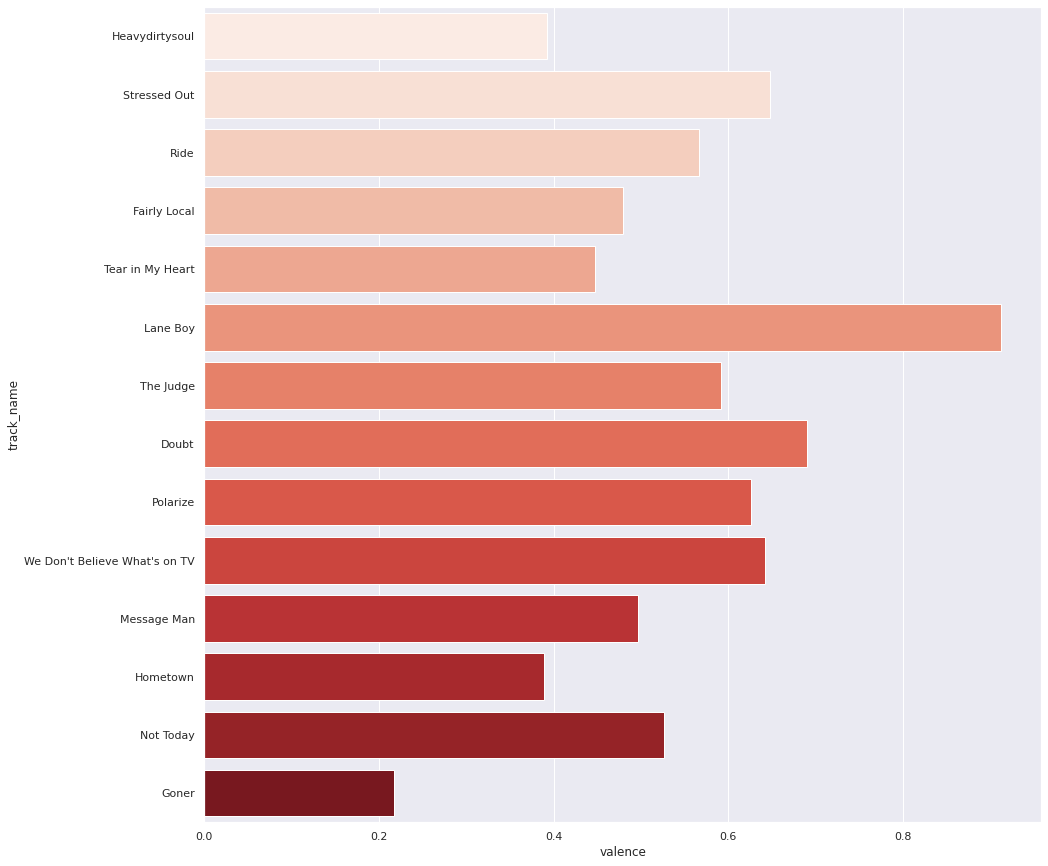

In [40]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y="track_name",x="valence",data=dfv[dfv.album_name=="Blurryface"],palette="Reds")

### *TRENCH*

In [41]:
temp = pd.DataFrame(dict(
    r=tren,
    theta=categories))
fig = px.line_polar(temp, r='r', theta='theta', line_close=True)
fig.update_layout(
    autosize=False,
    width=500,
    height=450,)
fig.update_traces(fill='toself',fillcolor='rgba(210, 173, 50, 0.67)')
fig.show()

**Valence for song:**


<AxesSubplot:xlabel='valence', ylabel='track_name'>

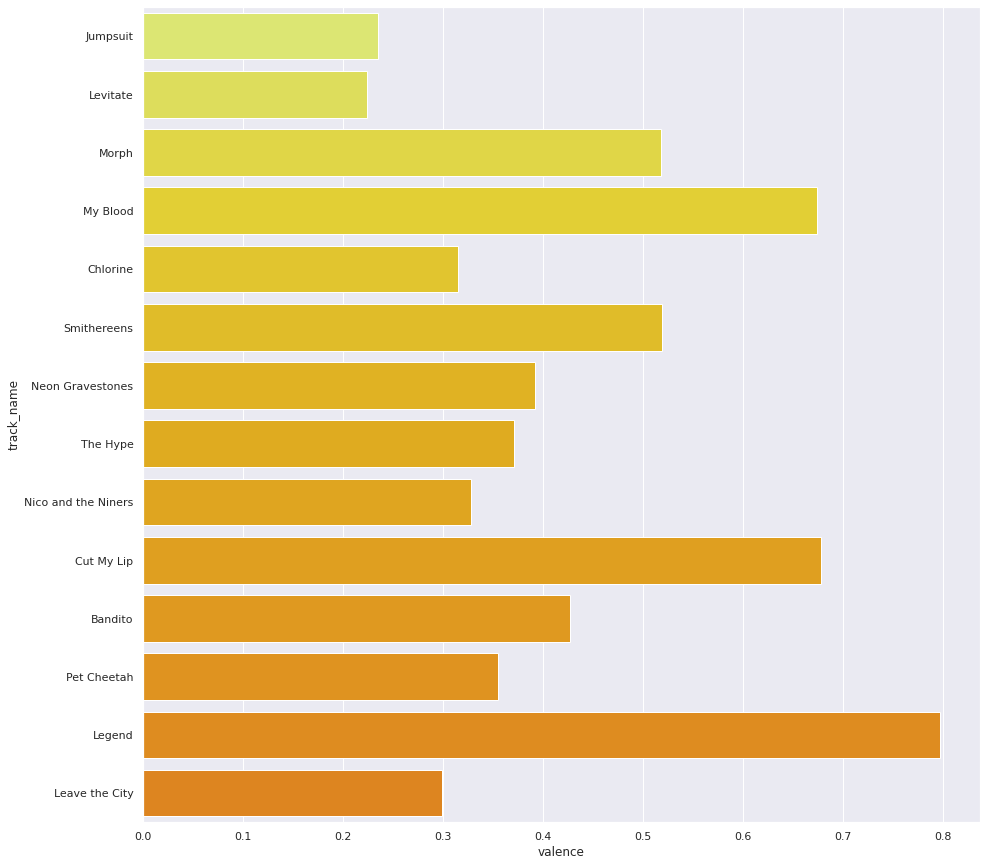

In [42]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y="track_name",x="valence",data=dfv[dfv.album_name=="Trench"],palette="Wistia")

### *SCALED AND ICY*

In [43]:
temp = pd.DataFrame(dict(
    r=sai,
    theta=categories))
fig = px.line_polar(temp, r='r', theta='theta', line_close=True,)
fig.update_layout(
    autosize=False,
    width=500,
    height=450,)
fig.update_traces(fill='toself',fillcolor='rgba(210, 50, 117, 0.5)')
fig.show()

**Valence for song:**


<AxesSubplot:xlabel='valence', ylabel='track_name'>

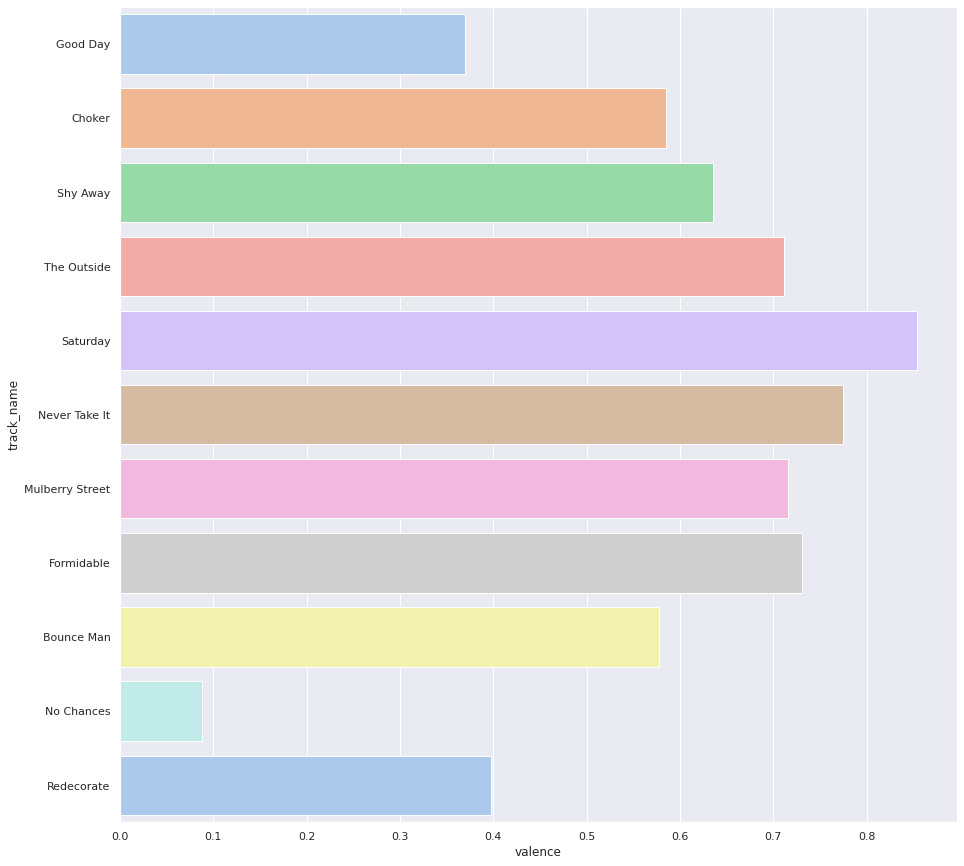

In [44]:
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(y="track_name",x="valence",data=dfv[dfv.album_name=="Scaled And Icy"],palette="pastel")